https://fxis.ai/edu/mastering-llama-3-1-a-guide-to-image-text-model-interactions/

## Check for cuda
- AutoModelForCausalLM.from_pretrained will error Torch not compiled with CUDA enabled. 
- You need to install this https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html. 
- In command prompt, check cuda version with 
```nvcc --version``` 
- Also have to install pytorch with cuda: 
```pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124```

In [1]:
import torch
import os



# needs to be True.
print('''*********Example torch.cuda.is_available():\n''', torch.cuda.is_available())
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)
print('''*********Example torch.cuda.memory_summary(device=None, abbreviated=False):\n''', torch.cuda.memory_summary(device=None, abbreviated=False))

os.environ["CUDA_VISIBLE_DEVICES"] = "0" # not sure if this makes a difference
device = torch.device('cuda')  # not sure if this makes a difference
print('''*********Example device:\n''', type(device))

HUGGING_FACE_TOKEN = os.environ["HUGGING_FACE_TOKEN"]


*********Example torch.cuda.is_available():
 True
*********Example torch.cuda.memory_summary(device=None, abbreviated=False):
 |===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory

## This doesn't work. It is not quantized, meaning it is larger, meaning it causes cuda out of memory
You would have to restart the kernel

In [2]:
import torch
from transformers import AutoModelForCausalLM

# This won't work unless you have cuda installed. 
model = AutoModelForCausalLM.from_pretrained(
    "qresearch/llama-3.1-8B-vision-378",
    trust_remote_code=True,
    torch_dtype=torch.float16,
).to("cuda") # currently have cuda version 12.6.68

c:\swe\code\Complete-Generative-AI-Course-on-YouTube\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [02:19<00:00, 34.92s/it]


## Quantizing works

In [2]:
# Alternative 4-bit quantization method
import torch
from transformers import BitsAndBytesConfig

bnb_cfg = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    llm_int8_skip_modules=["mm_projector", "vision_model"],
)



c:\swe\code\Complete-Generative-AI-Course-on-YouTube\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from transformers import AutoModelForCausalLM
import torch

# This won't work unless you have cuda installed. It downloads the model from hugging face (hf). After that, you can run it without internet.

model = AutoModelForCausalLM.from_pretrained(
    "qresearch/llama-3.1-8B-vision-378",
    trust_remote_code=True,
    torch_dtype=torch.float16,
    quantization_config=bnb_cfg,
)

`low_cpu_mem_usage` was None, now set to True since model is quantized.
Loading checkpoint shards:   0%|          | 0/4 [00:13<?, ?it/s]


KeyboardInterrupt: 

## Load tokenizer

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    "qresearch/llama-3.1-8B-vision-378",
    use_fast=True,
)

## Load anime image from url

*********Example response.content:
 b'\xff\xd8\xff\xe1\x0f\xfeExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00V\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00^\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x07\x90\x00\x00\x07\x00\x00\x00\x040221\x91\x01\x00\x07\x00\x00\x00\x04\x01\x02\x03\x00\xa0\x00\x00\x07\x00\x00\x00\x040100\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\x05\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02\xff\xa4\x06\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

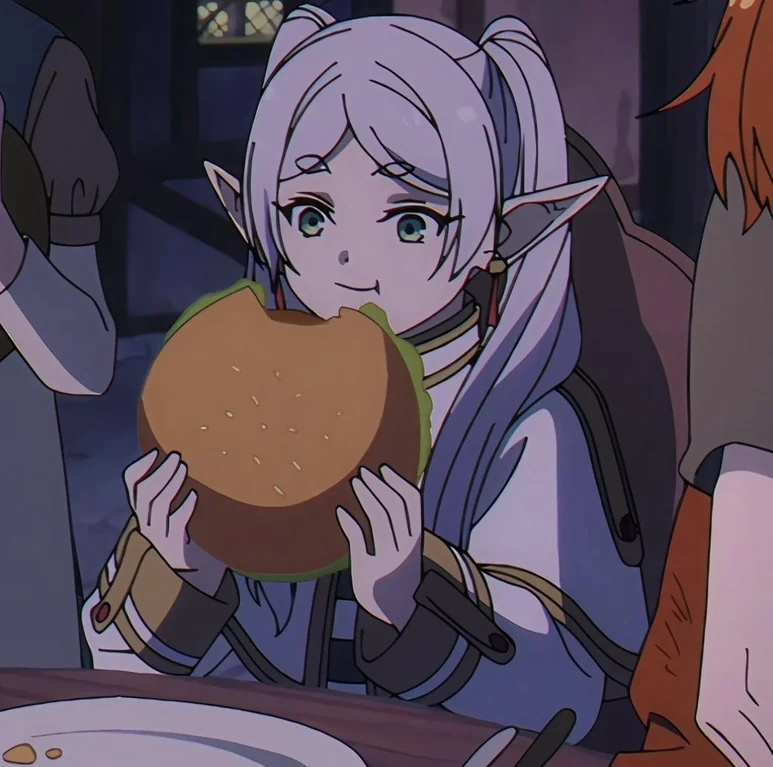

In [3]:
from PIL import Image
import requests
from io import BytesIO

url = "https://huggingface.co/qresearch/llama-3-vision-alpha-hf/resolve/main/assets/demo-2.jpg"
response = requests.get(url)
print("""*********Example response.content:\n""", response.content)
image = Image.open(BytesIO(response.content))
print('''*********Example BytesIO(response.content):\n''', BytesIO(response.content))
print("""*********Example image:\n""", image)
image

## Describe anime image

In [4]:
print(
    model.answer_question(
        image,
        "Briefly describe the image",
        tokenizer,
        max_new_tokens=128,
        do_sample=True,
        temperature=0.3,
    ),
)

c:\swe\code\Complete-Generative-AI-Course-on-YouTube\.venv\Lib\site-packages\transformers\models\siglip\modeling_siglip.py:573: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


The image is of a young woman with a kind face and a mischievous glint in her eye. She is holding a large hamburger in her hand, and her eyes are fixed on it with a look of longing. Her hair is styled in a messy bob, and she is wearing a casual outfit that suggests she is a student or a young professional. The background of the image is a warm and inviting one, with a wooden table and a few friends in the background, all of whom are enjoying their meals and chatting with each other.


## Load local smiley face

*********Example image:
 <PIL.PngImagePlugin.PngImageFile image mode=P size=360x360 at 0x21083CF5010>


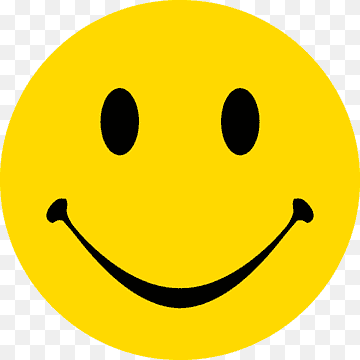

In [2]:
from PIL import Image
from io import BytesIO

filepath = "./image2.png"
binary_fc = open(filepath, "rb").read()  # fc aka file_content
image = Image.open(BytesIO(binary_fc))
print("""*********Example image:\n""", image)
image

## Describe smiley

In [4]:
print(
    model.answer_question(
        image,
        "Describe this image in less than 10 words",
        tokenizer,
        max_new_tokens=128,
        do_sample=True,
        temperature=0.3,
    ),
)

A smiling face with a friendly expression.


## pipeline multimodal text/image method

In [12]:
from transformers import pipeline
import torch

import os
HUGGING_FACE_TOKEN = os.environ["HUGGING_FACE_TOKEN"]

# model_id = "qresearch/llama-3.1-8B-vision-378"  # doesn't work. says "Unknown task image-text-to-text, available tasks are ['a...."
model_id = "google/vit-base-patch16-224" # this model sucks. says smiley face is a clock.

vision_classifier = pipeline(
    model=model_id,
    device_map="auto",  # with this, no need for device=0
    trust_remote_code=True,
    token=HUGGING_FACE_TOKEN,
    # device=0,
)

Loading checkpoint shards: 100%|██████████| 4/4 [00:30<00:00,  7.75s/it]
Some parameters are on the meta device device because they were offloaded to the cpu and disk.


In [14]:
preds = vision_classifier(
    # images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
    images="./image2.png",
    text_inputs="describe this image"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

ValueError: The following `model_kwargs` are not used by the model: ['images'] (note: typos in the generate arguments will also show up in this list)